# Crime Prediction in Chicago

### Description:
Crime is a major concern in urban areas, affecting public safety and quality of life. Chicago, one of the largest cities in the United States, has a rich history of crime data that can be analyzed to gain insights and make predictions. This project focuses on crime prediction in Chicago, leveraging historical data and machine learning to enhance law enforcement's ability to allocate resources and improve safety. The goal is to classify crime incidents based on the likelihood of arrest and provide probability estimates to inform decision-making.

The key challenges in this project include understanding diverse crime attributes, dealing with spatial and temporal variations, and ensuring the machine learning models accurately predict outcomes.

### Dataset:
The dataset consists of detailed records of reported crimes in Chicago for the year 2022, including approximately 239,558 incidents and 22 features. Each record includes attributes such as crime type, location, time, and outcomes (e.g., whether an arrest was made).

### The project implementation steps will go as follows:
Understand the dataset features (attributes):
Explore key features such as crime types, location descriptions, arrest outcomes, and geographic coordinates.
Apply the required data preprocessing methods:
Handle missing or inconsistent data, encode categorical features, and scale numerical data for model compatibility.
Build classification models to predict the likelihood of arrest and evaluate performance:
Implement and compare algorithms including Logistic Regression, SVM, Decision Trees, and KNN.
Visualize and interpret results:
Provide insights on factors influencing crime patterns and arrests, highlighting trends and key predictors.
Develop a GUI application:
Design a user-friendly interface to allow users to input new crime data and receive predictions with confidence scores.

## Chicago Crime Dataset Column Descriptions  

### Identification Columns  
1. ***`ID`***: A unique identifier for each crime incident.  
2. ***`Case Number`***: A unique case number assigned by the police.  

### Time and Location Details  
3. ***`Date`***: The date and time when the crime occurred (e.g., "2022-01-01 12:30:00").  
4. ***`Block`***: The block or street address where the crime occurred (e.g., "1000 S STATE ST").  
5. ***`Beat`***: The specific police beat, a sub-area patrolled by officers.  
6. ***`District`***: The police district where the crime occurred (ranges from 1 to 25).  
7. ***`Ward`***: The city ward where the incident occurred (ranges from 1 to 50).  
8. ***`Community Area`***: The designated community area in Chicago (ranges from 1 to 77).  
9. ***`Latitude`***: The latitude coordinate of the crime location (e.g., 41.8781).  
10. ***`Longitude`***: The longitude coordinate of the crime location (e.g., -87.6298).  
11. ***`Location`***: The geographic coordinates as a text string (e.g., "POINT (-87.629 41.875)").  

### Crime Details  
12. ***`IUCR`***: Illinois Uniform Crime Reporting code categorizing the crime type.  
13. ***`Primary Type`***: The main category of the crime (e.g., "THEFT").  
14. ***`Description`***: A detailed description of the crime (e.g., "Theft from Motor Vehicle").  
15. ***`Location Description`***: The type of location where the crime occurred (e.g., "STREET").  

### Outcome and Related Information  
16. ***`Arrest`***: Indicates if an arrest was made (**Binary: Yes/No**).  
17. ***`Domestic`***: Indicates if the crime was domestic-related (**Binary: Yes/No**).  

### Administrative Details  
18. ***`FBI Code`***: FBI classification code for the crime type.  
19. ***`Year`***: The year the crime occurred (e.g., "2022").  
20. ***`Updated On`***: The timestamp of when the record was last updated.  

### Mapping Coordinates  
21. ***`X Coordinate`***: The X-coordinate for mapping the crime location.  
22. ***`Y Coordinate`***: The Y-coordinate for mapping the crime location.  


## 1. Load Data and import Dependencies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
df=pd.read_csv("Data\\Crime Prediction in Chicago_Dataset.csv")

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [7]:
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,965
Arrest,0
Domestic,0


In [8]:
df.shape

(239558, 22)

## 2. Exploratory Data Analysis

In [9]:
# count Unique values in columns
uni=[]
names=df.columns
for i in df.columns:
    uni.append(df[i].nunique())
Unique_Values =pd.DataFrame({'Column':names,'Unique values':uni})

In [10]:
Unique_Values

,Column,Unique values
0,ID,239558
1,Case Number,239511
2,Date,112293
3,Block,27969
4,IUCR,305
5,Primary Type,31
6,Description,285
7,Location Description,135
8,Arrest,2
9,Domestic,2


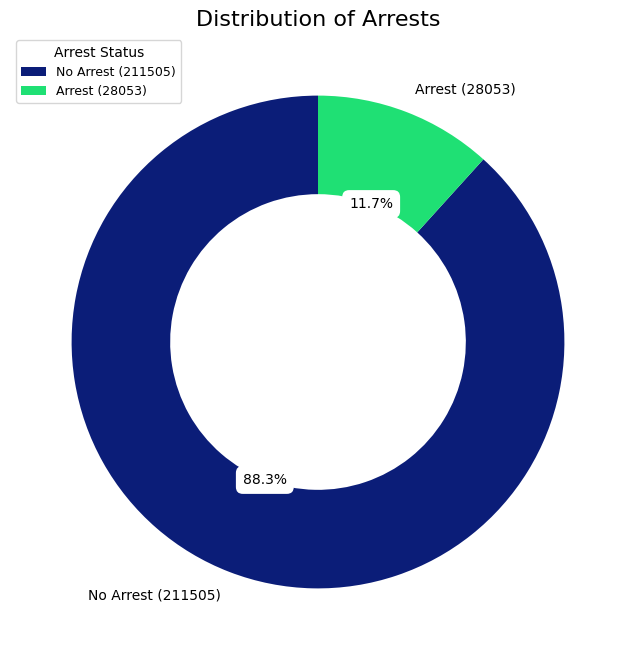

In [11]:
# Count the occurrences
arrest_counts = df['Arrest'].value_counts()

# Define labels for the chart
labels = [f'No Arrest ({arrest_counts[False]})', f'Arrest ({arrest_counts[True]})']

# Define a new color palette
colors = ['#0b1d78', '#1fe074']

# Plot the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(arrest_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})

# Add percentage inside a box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

# Add a legend
plt.legend(wedges, labels, title="Arrest Status", loc="upper left", fontsize=9)

# Title
plt.title('Distribution of Arrests', fontsize=16)

# Show the plot
plt.show()

In [12]:
# Extract hour,Day,month
df['Date'] = pd.to_datetime(df['Date'])
df['hour'] = df['Date'].dt.hour
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df.drop(columns=['Date'],inplace=True)

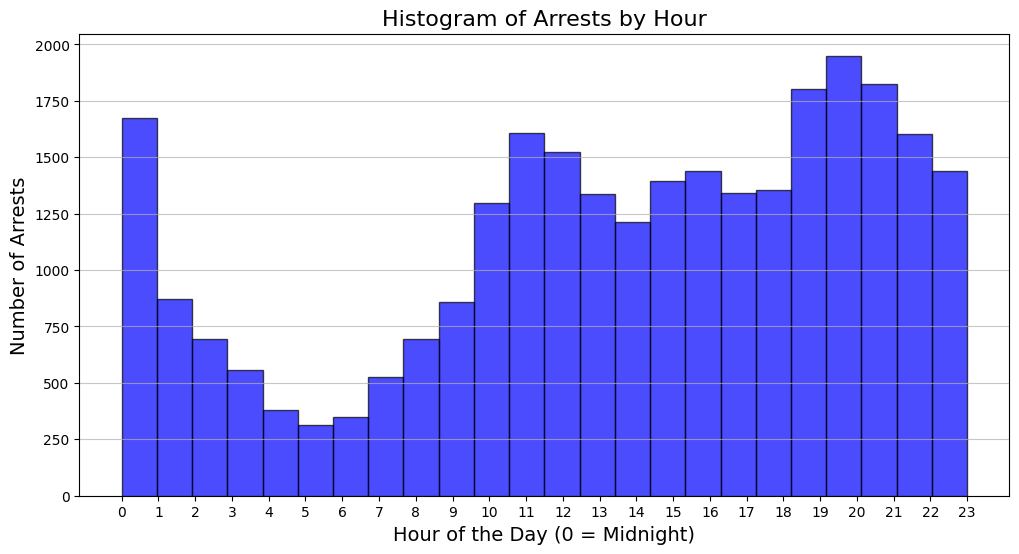

In [13]:
arrested_data = df[df['Arrest'] == True]
# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(arrested_data['hour'], bins=24, range=(0, 23), color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Arrests by Hour', fontsize=16)
plt.xlabel('Hour of the Day (0 = Midnight)', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.7)
plt.show()

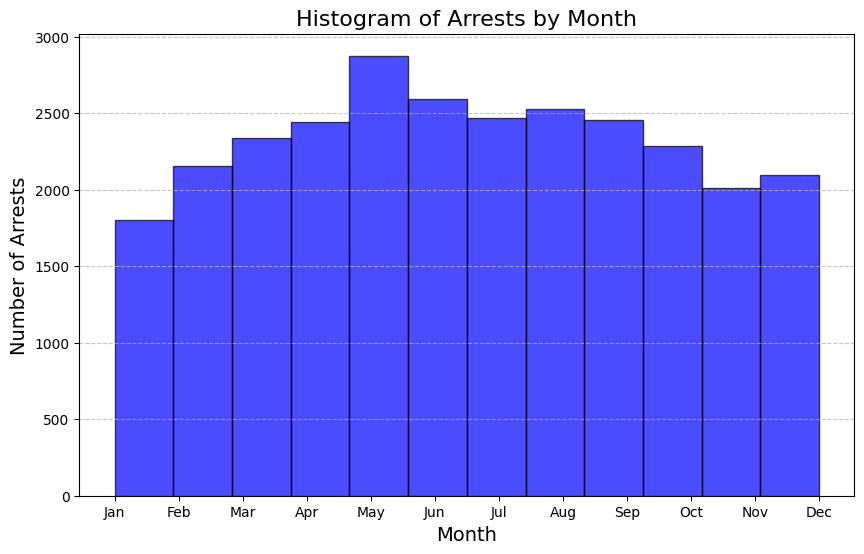

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(arrested_data['month'], bins=12, range=(1, 12), color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Arrests by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

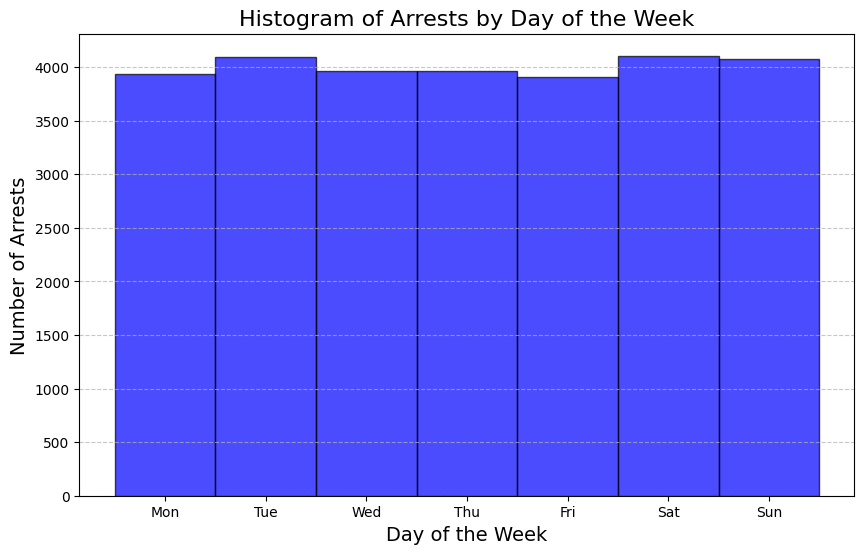

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(arrested_data['day_of_week'], bins=7, range=(-0.5, 6.5), color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Arrests by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

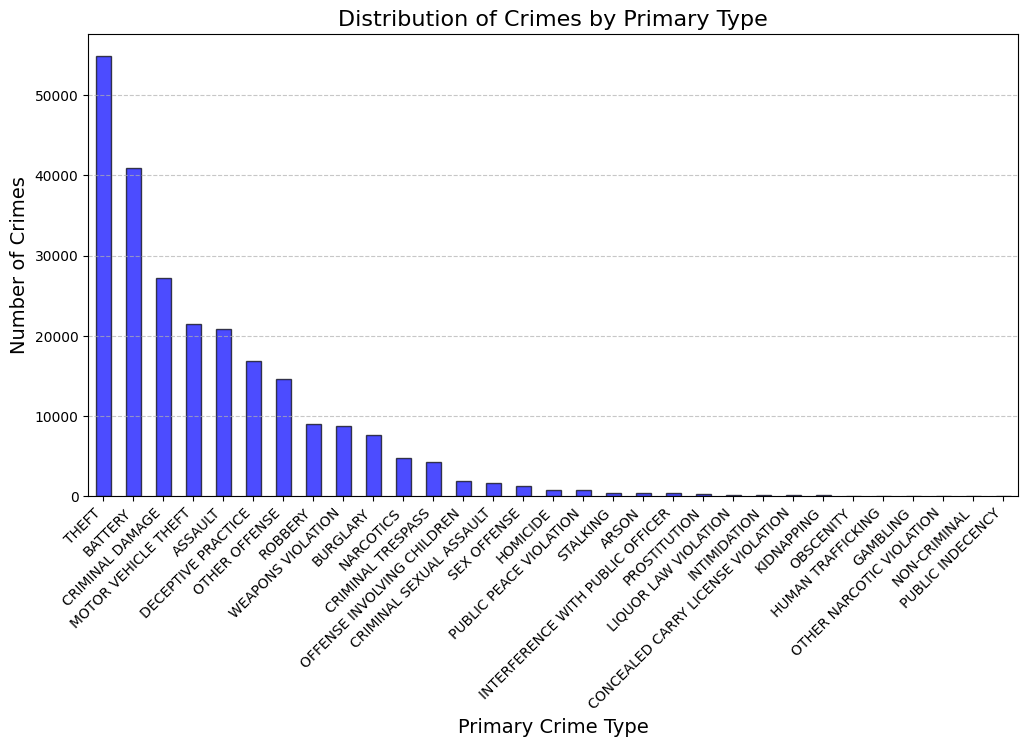

In [16]:
# Count the occurrences of each Primary Type
primary_type_counts = df['Primary Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
primary_type_counts.plot(kind='bar', color='blue', edgecolor='black', alpha=0.7)

# Title and labels
plt.title('Distribution of Crimes by Primary Type', fontsize=16)
plt.xlabel('Primary Crime Type', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Data Preprocessing

### Fill null values

In [17]:
df.isnull().sum()

,0
ID,0
Case Number,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,965
Arrest,0
Domestic,0
Beat,0


In [18]:
nFeatures= ['Location Description','X Coordinate','Y Coordinate','Ward','Latitude','Longitude','Location']
for i in nFeatures:
    df[i].fillna(df[i].mode()[0],inplace=True)

<ipython-input-18-8b91e7ed1440>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [19]:
df.isnull().sum()

,0
ID,0
Case Number,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0
Beat,0


In [20]:
df.duplicated().sum()

0

In [21]:
df.drop_duplicates(inplace=True)

### Check Range of values

In [22]:
rows_to_drop = df[~((df['Beat'] >= 1) & (df['Beat'] <= 3000))].index
df.drop(index=rows_to_drop, inplace=True)

In [23]:
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hour,day_of_week,month
0,12592454,JF113025,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,...,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)",15,4,1
1,12785595,JF346553,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,...,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)",21,4,8
2,12808281,JF373517,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,...,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)",14,6,8
3,12888104,JF469015,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,...,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)",3,3,11
4,13209277,JG422539,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,...,1176352.0,1934241.0,2022,9/14/2023 15:43,41.976290,-87.905227,"(41.976290414, -87.905227221)",9,0,8


In [24]:
rows_to_drop = df[~((df['Latitude'] >= 41.644) & (df['Latitude'] <= 42.023))].index
df.drop(index=rows_to_drop, inplace=True)

In [25]:
df[((df['Longitude'] <= -87.524) | (df['Longitude'] >= 87.940))]

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hour,day_of_week,month
0,12592454,JF113025,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,...,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)",15,4,1
1,12785595,JF346553,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,...,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)",21,4,8
2,12808281,JF373517,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,...,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)",14,6,8
3,12888104,JF469015,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,...,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)",3,3,11
4,13209277,JG422539,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,...,1176352.0,1934241.0,2022,9/14/2023 15:43,41.976290,-87.905227,"(41.976290414, -87.905227221)",9,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,27038,JF387886,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,2433,...,1167747.0,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)",10,3,9
239554,26819,JF275138,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1235,...,1173423.0,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)",23,4,6
239555,26601,JF132803,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,511,...,1178641.0,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)",16,3,2
239556,26857,JF290575,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1031,...,1149162.0,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)",2,3,6


In [26]:
df[((df['District'] < 1) | (df['District'] > 25))]

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hour,day_of_week,month
2703,12637539,JF168329,039XX W CHICAGO AVE,810,THEFT,OVER $500,SMALL RETAIL STORE,True,False,1112,...,1124178.0,1931354.0,2022,2/28/2024 15:40,41.968013,-87.818796,"(41.968013038, -87.818796103)",14,2,3
29225,12622711,JF150203,0000X W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,True,False,1654,...,1091242.0,1941464.0,2022,1/3/2023 15:40,41.996235,-87.939733,"(41.996235316, -87.939732936)",7,6,2
30212,12623847,JF151637,0000X W OHARE ST,460,BATTERY,SIMPLE,AIRPORT PARKING LOT,True,False,1654,...,1091242.0,1941464.0,2022,1/3/2023 15:40,41.996235,-87.939733,"(41.996235316, -87.939732936)",15,0,2
37718,12788532,JF350295,039XX W CHICAGO AVE,1200,DECEPTIVE PRACTICE,STOLEN PROPERTY BUY / RECEIVE / POSSESS,SMALL RETAIL STORE,True,False,1112,...,1124178.0,1931354.0,2022,6/1/2023 15:41,41.968013,-87.818796,"(41.968013038, -87.818796103)",12,1,8
66277,12769365,JF326644,068XX N OLMSTED AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1612,...,1123387.0,1944678.0,2022,1/3/2023 15:40,42.004588,-87.821412,"(42.004588494, -87.82141179)",21,3,7
90624,12804161,JF368783,039XX W CHICAGO AVE,1200,DECEPTIVE PRACTICE,STOLEN PROPERTY BUY / RECEIVE / POSSESS,SMALL RETAIL STORE,True,False,1112,...,1124178.0,1931354.0,2022,6/1/2023 15:41,41.968013,-87.818796,"(41.968013038, -87.818796103)",14,2,8
97552,12689730,JF229828,005XX W OHARE ST,560,ASSAULT,SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1653,...,1107552.0,1930183.0,2022,1/3/2023 15:40,41.965057,-87.879953,"(41.965057367, -87.879953326)",7,1,4
104476,12683546,JF222979,005XX W OHARE ST,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,...,1107552.0,1930183.0,2022,1/3/2023 15:40,41.965057,-87.879953,"(41.965057367, -87.879953326)",15,1,4
109189,12637125,JF167692,109XX W HIGGINS RD,325,ROBBERY,VEHICULAR HIJACKING,GAS STATION,False,False,1654,...,1103606.0,1943990.0,2022,1/3/2023 15:40,42.003002,-87.894202,"(42.003002023, -87.894202026)",20,1,3
110617,12821739,JF389432,039XX W CHICAGO AVE,1200,DECEPTIVE PRACTICE,STOLEN PROPERTY BUY / RECEIVE / POSSESS,SMALL RETAIL STORE,True,False,1112,...,1124178.0,1931354.0,2022,6/1/2023 15:41,41.968013,-87.818796,"(41.968013038, -87.818796103)",13,4,9


In [27]:
rows_to_drop = df[~((df['District'] >= 1) & (df['District'] <= 25))].index
df.drop(index=rows_to_drop, inplace=True)

In [28]:
df.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239541 entries, 0 to 239557
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239541 non-null  int64  
 1   Case Number           239541 non-null  object 
 2   Block                 239541 non-null  object 
 3   IUCR                  239541 non-null  object 
 4   Primary Type          239541 non-null  object 
 5   Description           239541 non-null  object 
 6   Location Description  239541 non-null  object 
 7   Arrest                239541 non-null  bool   
 8   Domestic              239541 non-null  bool   
 9   Beat                  239541 non-null  int64  
 10  District              239541 non-null  int64  
 11  Ward                  239541 non-null  float64
 12  Community Area        239541 non-null  int64  
 13  FBI Code              239541 non-null  object 
 14  X Coordinate          239541 non-null  float64
 15  Y Coo

In [30]:
columns_to_drop =  ['ID','Case Number','X Coordinate', 'Y Coordinate','Year', 'Updated On','Location']
df.drop(columns=columns_to_drop,inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239541 entries, 0 to 239557
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 239541 non-null  object 
 1   IUCR                  239541 non-null  object 
 2   Primary Type          239541 non-null  object 
 3   Description           239541 non-null  object 
 4   Location Description  239541 non-null  object 
 5   Arrest                239541 non-null  bool   
 6   Domestic              239541 non-null  bool   
 7   Beat                  239541 non-null  int64  
 8   District              239541 non-null  int64  
 9   Ward                  239541 non-null  float64
 10  Community Area        239541 non-null  int64  
 11  FBI Code              239541 non-null  object 
 12  Latitude              239541 non-null  float64
 13  Longitude             239541 non-null  float64
 14  hour                  239541 non-null  int32  
 15  day_o

In [32]:
bool_cols=['Arrest','Domestic']
for col in bool_cols:
    df[col] = df[col].astype(int)


In [33]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=['Block','IUCR','Location Description','Primary Type','Description','FBI Code']
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))



In [34]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,hour,day_of_week,month
0,22436,167,22,129,102,0,1,724,7,16.0,68,20,41.771782,-87.649437,15,4,1
1,23281,85,27,229,17,1,0,324,3,5.0,69,13,41.763338,-87.597001,21,4,8
2,19518,87,27,13,102,0,0,1621,16,39.0,11,13,41.985875,-87.766404,14,6,8
3,23244,69,30,216,119,0,0,733,7,17.0,68,11,41.762615,-87.652840,3,3,11
4,449,284,29,183,45,0,0,113,1,4.0,32,23,41.976290,-87.905227,9,0,8


### Data Resampling to remove Bias

In [35]:
from sklearn.utils import resample

rue_class = df[df['Arrest'] == True]
false_class = df[df['Arrest'] == False]

true_class_upsampled = resample(true_class,
                                replace=True,
                                n_samples=len(false_class),
                                random_state=42)

df = pd.concat([true_class_upsampled, false_class])


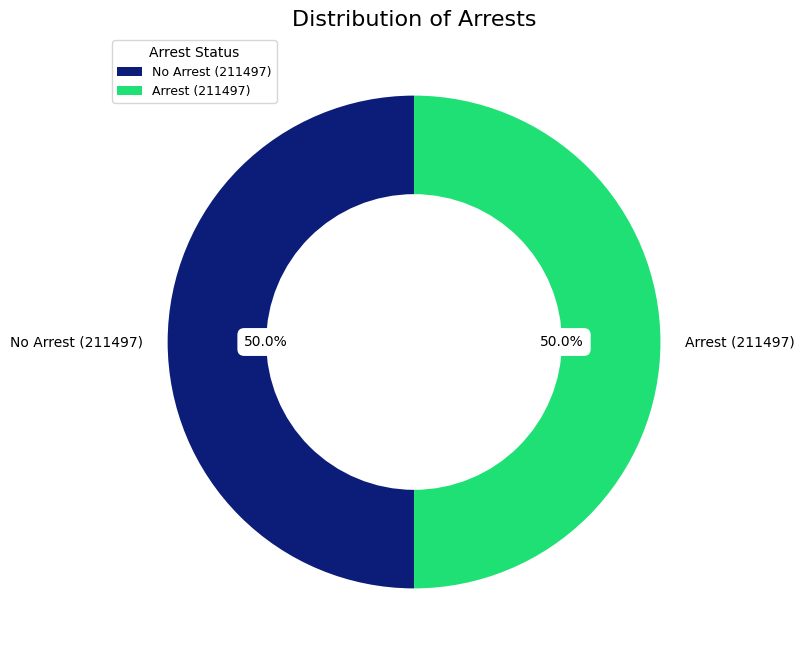

In [36]:
arrest_counts = df['Arrest'].value_counts()

labels = [f'No Arrest ({arrest_counts[0]})', f'Arrest ({arrest_counts[1]})']

colors = ['#0b1d78', '#1fe074']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(arrest_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

plt.legend(wedges, labels, title="Arrest Status", loc="upper left", fontsize=9)
plt.title('Distribution of Arrests', fontsize=16)
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422994 entries, 196445 to 239557
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 422994 non-null  int64  
 1   IUCR                  422994 non-null  int64  
 2   Primary Type          422994 non-null  int64  
 3   Description           422994 non-null  int64  
 4   Location Description  422994 non-null  int64  
 5   Arrest                422994 non-null  int64  
 6   Domestic              422994 non-null  int64  
 7   Beat                  422994 non-null  int64  
 8   District              422994 non-null  int64  
 9   Ward                  422994 non-null  float64
 10  Community Area        422994 non-null  int64  
 11  FBI Code              422994 non-null  int64  
 12  Latitude              422994 non-null  float64
 13  Longitude             422994 non-null  float64
 14  hour                  422994 non-null  int32  
 15  

In [38]:
y=df['Arrest']
X=df.drop(columns='Arrest',axis=1)

### Analyze Correlation between Features

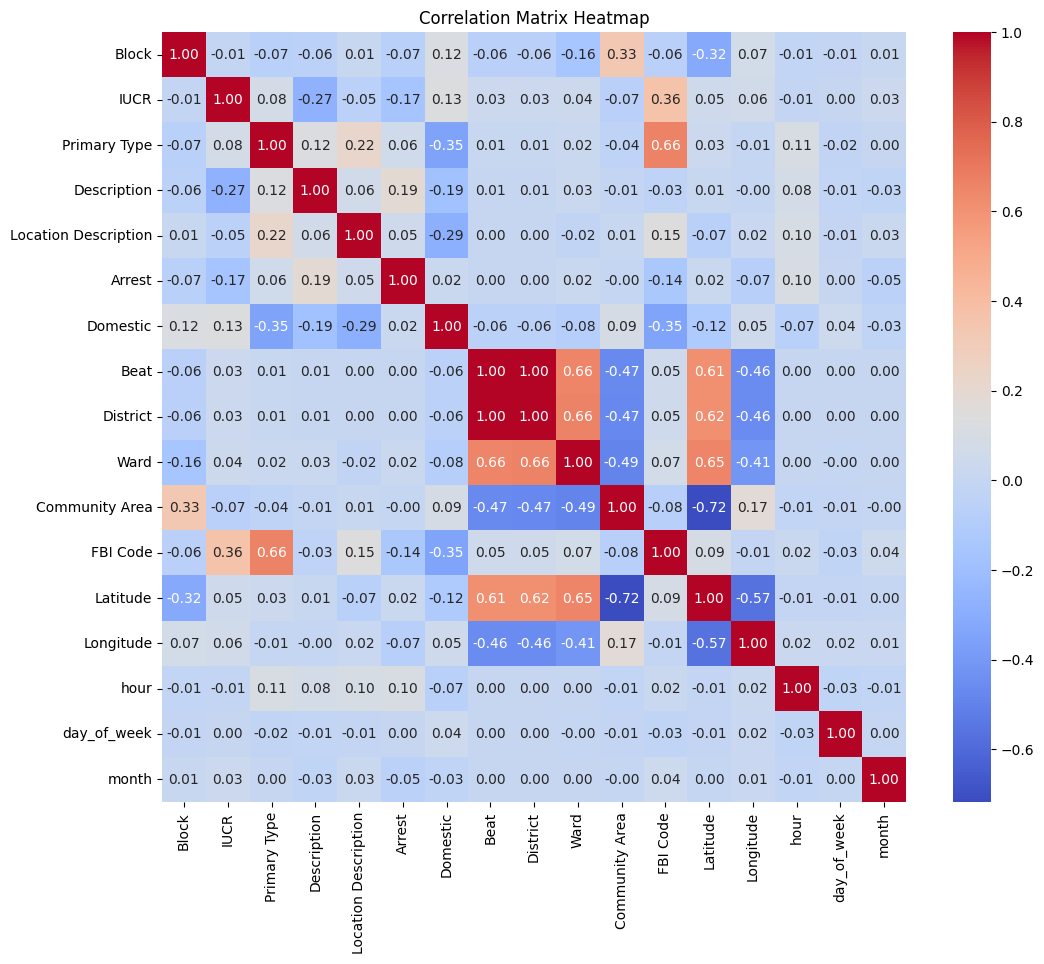

In [39]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data Scalling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

### Data Splititng

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)

### Feature Selection

                 Feature  Importance
1                   IUCR    0.171759
10              FBI Code    0.150206
12             Longitude    0.074862
0                  Block    0.073642
11              Latitude    0.072072
3            Description    0.069445
13                  hour    0.060571
4   Location Description    0.053299
2           Primary Type    0.052811
15                 month    0.050340
6                   Beat    0.048196
14           day_of_week    0.039910
9         Community Area    0.028254
8                   Ward    0.027991
7               District    0.015062
5               Domestic    0.011580


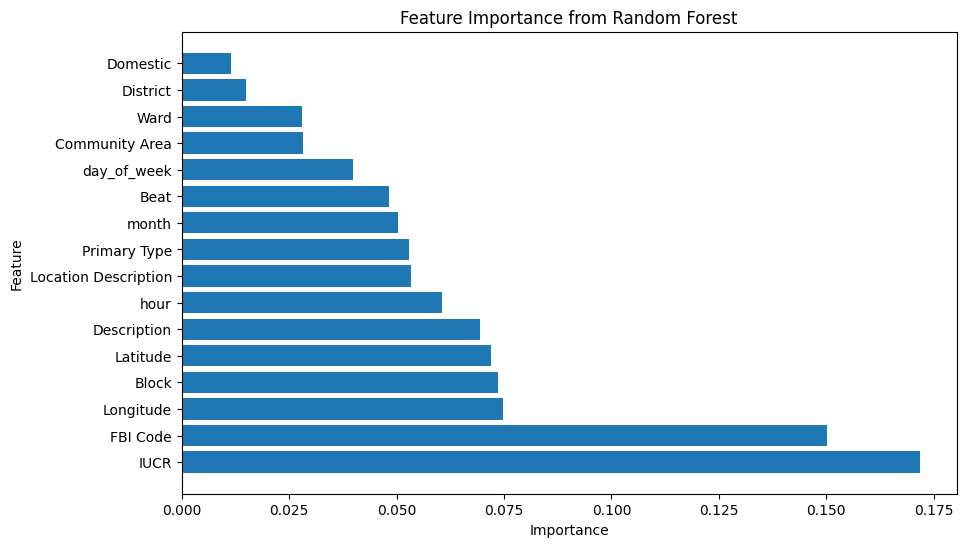

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df.drop(columns='Arrest', axis=1).columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [43]:
non_important_features = feature_importance_df[feature_importance_df.Importance < 0.03].Feature.tolist()
non_important_features
df = df.drop(columns=non_important_features, axis=1)

In [44]:
df.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Beat', 'FBI Code', 'Latitude', 'Longitude', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [45]:
y=df['Arrest']
X=df.drop(columns='Arrest',axis=1)

In [46]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [47]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)

## 4. Model Implementation

### Decision Tree Classifier

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
}


dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


model_arr=[]
accuracy_arr=[]

model_arr.append('Decision Tree')
accuracy_arr.append(accuracy_score(y_test, y_pred)*100)

cr=classification_report(y_test, y_pred)
print(cr)
cm=pd.DataFrame(confusion_matrix(y_test, y_pred))
cm


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.939364689016785
Test Accuracy: 0.9491837964987766
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     84599
           1       0.91      1.00      0.95     84599

    accuracy                           0.95    169198
   macro avg       0.95      0.95      0.95    169198
weighted avg       0.95      0.95      0.95    169198



,0,1
0,76397,8202
1,396,84203


### Random Forest Classifier

According to Grid Search in Decsion Tree Classifier  

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best Hyperparameters (Random Forest):", grid_search_rf.best_params_)
print("Best Score (Random Forest):", grid_search_rf.best_score_)

best_rf_classifier = grid_search_rf.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy (Random Forest):", accuracy_rf)

model_arr.append('Random Forest')
accuracy_arr.append(accuracy_score(y_test, y_pred_rf) * 100)

cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)
cm_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_rf))
cm_rf

Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Random Forest): 0.9726158055469742
Test Accuracy (Random Forest): 0.9803721084173572
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84599
           1       0.97      1.00      0.98     84599

    accuracy                           0.98    169198
   macro avg       0.98      0.98      0.98    169198
weighted avg       0.98      0.98      0.98    169198



,0,1
0,81685,2914
1,407,84192


### XGBoost

In [50]:
import xgboost as xgb
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)
print("Best Score (XGBoost):", grid_search_xgb.best_score_)

best_xgb_classifier = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Test Accuracy (XGBoost):", accuracy_xgb)

model_arr.append('XGBoost')
accuracy_arr.append(accuracy_score(y_test, y_pred_xgb) * 100)

cr_xgb = classification_report(y_test, y_pred_xgb)
print(cr_xgb)
cm_xgb = pd.DataFrame(confusion_matrix(y_test, y_pred_xgb))
cm_xgb

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score (XGBoost): 0.8662311455680392
Test Accuracy (XGBoost): 0.8707608836983889
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     84599
           1       0.87      0.87      0.87     84599

    accuracy                           0.87    169198
   macro avg       0.87      0.87      0.87    169198
weighted avg       0.87      0.87      0.87    169198



,0,1
0,73596,11003
1,10864,73735


### KNN

In [51]:
param_grid_knn = {
    'n_neighbors': [9,13,17,21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


knn_classifier = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print("Best Hyperparameters (KNN):", grid_search_knn.best_params_)
print("Best Score (KNN):", grid_search_knn.best_score_)

best_knn_classifier = grid_search_knn.best_estimator_
y_pred_knn = best_knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy (KNN):", accuracy_knn)

model_arr.append('KNN')
accuracy_arr.append(accuracy_score(y_test, y_pred_knn) * 100)

cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)
cm_knn = pd.DataFrame(confusion_matrix(y_test, y_pred_knn))
cm_knn

Best Hyperparameters (KNN): {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}
Best Score (KNN): 0.8935956479304519
Test Accuracy (KNN): 0.895170155675599
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     84599
           1       0.83      1.00      0.90     84599

    accuracy                           0.90    169198
   macro avg       0.91      0.90      0.89    169198
weighted avg       0.91      0.90      0.89    169198



,0,1
0,67131,17468
1,269,84330


### Support Vector Machine

don't use grid search because of time complexity

In [52]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")

cr_svm = classification_report(y_test, y_pred_svm)
print(f"Classification Report (SVM):\n{cr_svm}")

cm_svm = pd.DataFrame(confusion_matrix(y_test, y_pred_svm))
print(f"Confusion Matrix (SVM):\n{cm_svm}")

Accuracy (SVM): 0.6058818662159127
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.61      0.60      0.60     84599
           1       0.61      0.61      0.61     84599

    accuracy                           0.61    169198
   macro avg       0.61      0.61      0.61    169198
weighted avg       0.61      0.61      0.61    169198

Confusion Matrix (SVM):
       0      1
0  50904  33695
1  32989  51610


In [57]:
model_arr.append('SVM')
accuracy_arr.append(accuracy_score(y_test, y_pred_svm) * 100)


### Logistic Regression

In [53]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_classifier = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter

grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, y_train)

print("Best Hyperparameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best Score (Logistic Regression):", grid_search_lr.best_score_)

best_lr_classifier = grid_search_lr.best_estimator_
y_pred_lr = best_lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy (Logistic Regression):", accuracy_lr)

model_arr.append('Logistic Regression')
accuracy_arr.append(accuracy_score(y_test, y_pred_lr) * 100)

cr_lr = classification_report(y_test, y_pred_lr)
print(cr_lr)
cm_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_lr))
cm_lr

Best Hyperparameters (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best Score (Logistic Regression): 0.5978581229916471
Test Accuracy (Logistic Regression): 0.5979976122649204
              precision    recall  f1-score   support

           0       0.60      0.61      0.60     84599
           1       0.60      0.59      0.59     84599

    accuracy                           0.60    169198
   macro avg       0.60      0.60      0.60    169198
weighted avg       0.60      0.60      0.60    169198



,0,1
0,51625,32974
1,35044,49555


In [60]:
acc_df=pd.DataFrame(columns=['Model', 'Accuracy'])
acc_df['Model']=model_arr
acc_df['Accuracy']=accuracy_arr

In [63]:
acc_df=acc_df[acc_df['Accuracy'] >= 50 ]

## 5. Model Selection

### Visualization Of Accuracies

<ipython-input-64-235e89da9aeb>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


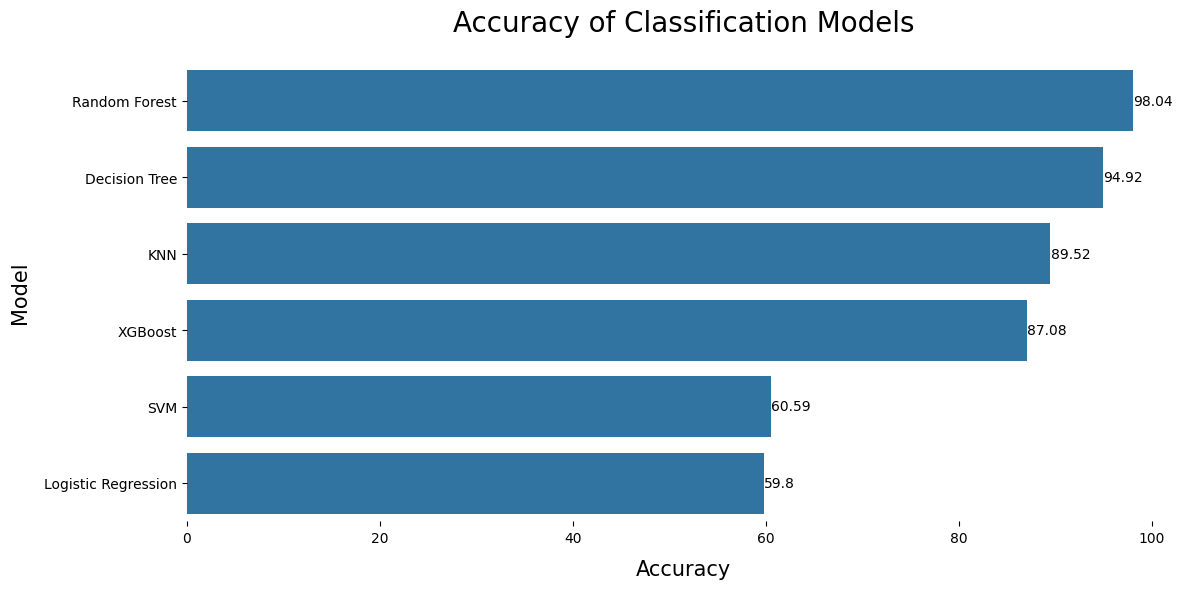

In [64]:

plt.figure(figsize=(12, 6))
sorted_df = acc_df.sort_values('Accuracy', ascending=False)
ax = sns.barplot(data=sorted_df, y='Model', x='Accuracy', orient ="h")
ax.set_xlabel('Accuracy', fontsize=15, labelpad=10)
ax.set_ylabel('Model', fontsize=15, labelpad=10)
ax.set_title('Accuracy of Classification Models', fontsize=20, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()

for patch in ax.patches:
    x = patch.get_x()
    y = patch.get_y()
    width = patch.get_width()
    height = patch.get_height()
    center_y = y + height / 2
    right_x = x + width
    ax.text(right_x + 0.01, center_y, round(width, 2),
            ha='left', va='center', fontsize=10)

plt.show()

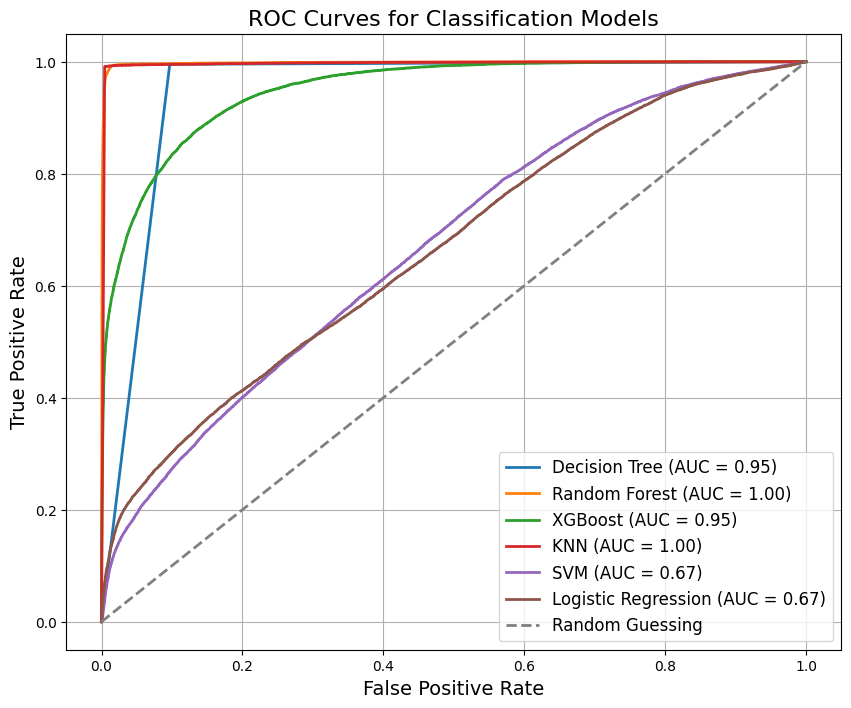

In [65]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    'XGBoost': best_xgb_classifier,
    'KNN': best_knn_classifier,
    'SVM': svm_classifier,
    'Logistic Regression': best_lr_classifier
}

y_pred_probs = {}
for name, clf in classifiers.items():
    if name == 'SVM':
        y_pred_probs[name] = clf.decision_function(X_test)
    else:
        y_pred_probs[name] = clf.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 8))

for name, probs in y_pred_probs.items():
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Classification Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

In [66]:
import joblib

joblib.dump(best_dt_classifier, 'best_dt_classifier.pkl')
joblib.dump(best_rf_classifier, 'best_rf_classifier.pkl')
joblib.dump(best_xgb_classifier, 'best_xgb_classifier.pkl')
joblib.dump(best_knn_classifier, 'best_knn_classifier.pkl')
joblib.dump(svm_classifier, 'svm_classifier.pkl')
joblib.dump(best_lr_classifier, 'best_lr_classifier.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully.")

Models and scaler saved successfully.


In [67]:
categorical_cols = ['Block','IUCR','Location Description','Primary Type','Description','FBI Code']
for col in categorical_cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col].astype(str))
  joblib.dump(encoder, f'{col}_encoder.pkl')

print("Label encoders saved successfully.")

Label encoders saved successfully.
